# Variable Analysis for Student Retention Rates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from tools.utils import combine_columns, compute_feature_importance

Given the preliminary feature analysis conducted in the `EDA.ipynb`, we have found that the following variables affect retention rates.

* Four-year retention rates
    - `SAT_AVG`
    - `AVGFASCAL`
    
* Less-than-four-year retention rates
    - `Ethnic Diversity (UGDS)`
    - `CCUGPROF`

Now, we are going to conduct further analysis including linear regression in order to explore the true relationship between these features and retention rates. 

## Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

## Racial and Ethnic Diversity Analysis

In [32]:
race_columns = ['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
                'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN']
data[race_columns]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440
1,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059
2,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235
3,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252
4,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111
...,...,...,...,...,...,...,...,...,...
6676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These columns provide information on the racial and ethnic diversity of undergraduate, degree-seeking students in a particular institutions. 

* white (UGDS_WHITE)

* black (UGDS_BLACK)

* Hispanic (UGDS_HISP)

* Asian (UGDS_ASIAN)

* American Indian/Alaska Native (UGDS_AIAN)

* Native Hawaiian/Pacific Islander (UGDS_NHPI)

* two or more races (UGDS_2MOR)

* non-resident aliens (UGDS_NRA)

* unknown (UGDS_UNKN)

We will be using the **Simpson's Diversity Index** to describe the Racial and Ethnic diversity of professions schools in the United States. 

$$1 - \sum_{i=1}^{n} p_i^2$$ 

In [33]:
data['diversity_index'] = 1 - data[race_columns].apply(lambda row: row**2, axis=1).sum(axis=1)
data['diversity_index']

0       0.183444
1       0.628836
2       0.455797
3       0.469490
4       0.140635
          ...   
6676    1.000000
6677    1.000000
6678    1.000000
6679    1.000000
6680    1.000000
Name: diversity_index, Length: 6681, dtype: float64

In [34]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'diversity_index']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'diversity_index']]

In [35]:
FT4_institutions.head()

,RET_FT4,diversity_index
0,0.5403,0.183444
1,0.8640,0.628836
2,0.5000,0.455797
3,0.8180,0.469490
4,0.6202,0.140635


In [36]:
FTL4_institutions.head()

,RET_FTL4,diversity_index
6,0.5915,0.430426
11,0.5538,0.661073
13,0.5961,0.588972
14,0.5449,0.527717
16,0.5357,0.478832


### Comparing the Diversity and Retention Rates between four-year and less-than-four-year institution

In [1]:
# four-year institutions
print(FT4_institutions['RET_FT4'].mean(), FT4_institutions['diversity_index'].mean())

NameError: name 'FT4_institutions' is not defined

In [38]:
# less-than-four-year institutions
print(FTL4_institutions['RET_FTL4'].mean(), FTL4_institutions['diversity_index'].mean())

0.6909051969012266 0.47995730161071665


#### Four-year institutions

When you have two massive continuous data and you want to visualize their relationship, you can use a scatter plot. Scatter plots are useful for visualizing the relationship between two continuous variables. Each data point is plotted as a point on the graph, with one variable on the x-axis and the other on the y-axis.

However, if you have a large number of data points, a scatter plot can become overcrowded and difficult to interpret. In such cases, you can use a 2D density plot. These plots provide a way to visualize the distribution of the data while reducing the clutter caused by overlapping points in a scatter plot. A 2D density plot creates a smoothed representation of the data by estimating the density of points in different regions of the plot.

* $H_0:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

In [39]:
corr, p_value = stats.pearsonr(FT4_institutions['diversity_index'], FT4_institutions['RET_FT4'])
print(corr, p_value)

-0.012020871881703171 0.583742479083747


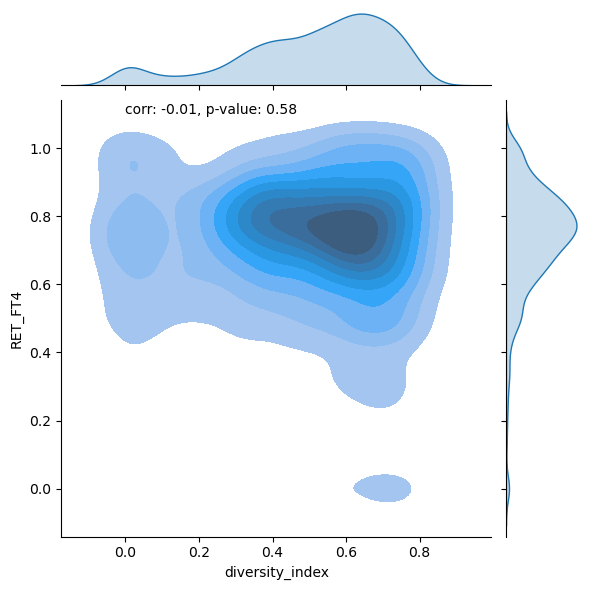

In [40]:
f = sns.jointplot(data=FT4_institutions, x='diversity_index', y='RET_FT4', kind='kde', fill='b')
f.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2f}', xy=(0,1.1))
plt.savefig('figures/RET_FT4_diversity.png');

**The p-value is around 0.58, which is very large. This means that we can conclude that there is no relationship between retention rate and diversity index at four-year institutions.**

#### Less than four-year institutions

* $H_0:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

In [41]:
corr, p_value = stats.pearsonr(FTL4_institutions['diversity_index'], FTL4_institutions['RET_FTL4'])
print(corr, p_value)

-0.08259689032835084 4.15791895176101e-06


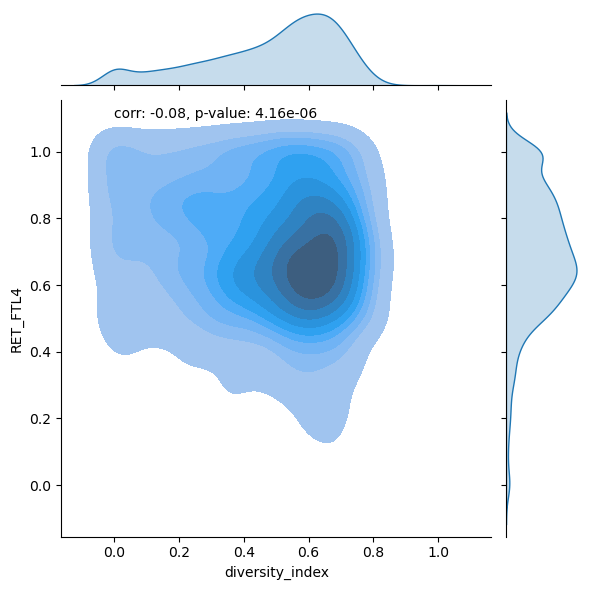

In [42]:
g = sns.jointplot(data=FTL4_institutions, x='diversity_index', y='RET_FTL4', kind='kde', fill='b')
g.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2e}', xy=(0,1.1))
plt.savefig('figures/RET_FTL4_diversity.png');

**The p-value is very small. This means that we can conclude that there is a relationship between retention rate and diversity index at less-than-four-year institutions. The correlation between diversity index and retention rate is negative. Therefore, we can conclude that as diversity index increases, the retention rate for less-than-four-year institution decreases.**

## Analysis on Programs offered (PRGMOFR) 

Notice that of the institutions with data, a large proportion offer only a few programs. Upon close inspection, these appear to be highly specialized trade schools

In [ ]:
data.PRGMOFR.value_counts()[:10]

1.0     379
2.0     352
3.0     342
4.0     309
5.0     214
6.0     156
7.0     105
9.0      72
8.0      60
10.0     43
Name: PRGMOFR, dtype: int64

In [ ]:
data[data.PRGMOFR<=10].INSTNM

17         New Beginning College of Cosmetology
60           Alaska Vocational Technical Center
62                        Alaska Career College
63                  Empire Beauty School-Tucson
64             Carrington College-Phoenix North
                         ...                   
6116     San Joaquin Valley College-Porterville
6118                  Ruben's Five Star Academy
6123         Miller-Motte College-Chattanooga 2
6125          Elite Welding Academy South Point
6126    Zorganics Institute Beauty and Wellness
Name: INSTNM, Length: 2032, dtype: object

Therefore, we may want to explore these low programs offered institutinos separately. 

But there is a caveat: note that ```UNITID``` is the pkey, and that 98 Institutions of the same name are connected to multiple ```UNITID```'s

In [ ]:
print("UNITID is the primary key: ", len(data) == len(data.groupby("UNITID")))
print("INSTNM is the primary key: ", len(data) == len(data.groupby("INSTNM")))

UNITID is the primary key:  True
INSTNM is the primary key:  False


We hypothesize that institutions with thh same name ```INSTNM``` are actually the same parent institution with sub-institutions denoted by different ```UNITID```'s.

This would mean that the number of programs offered is undercounted, and we should sum the number of programs offered for each 'parent institution'.

Let us informally explore this hypothesis by plotting how many institutions may have multiple ID's ```UNITID``` under one name ```INSTNM```

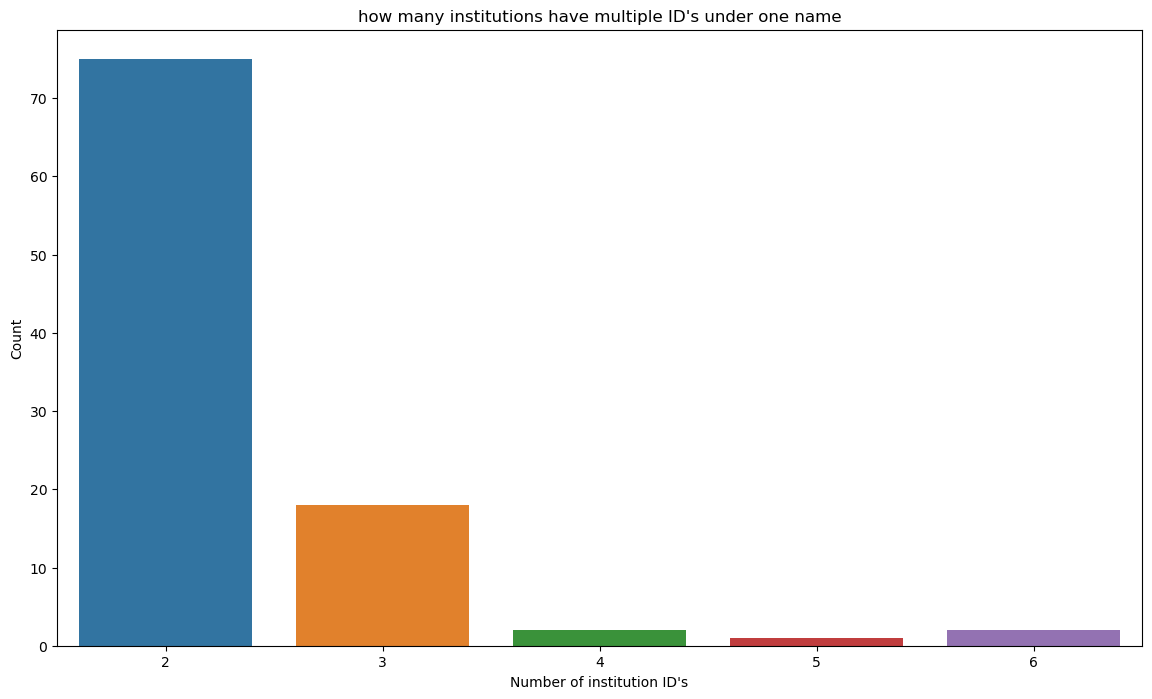

In [ ]:
# find the count of institutions by the same name with multiple ID's 
num_UNITID_per_INSTNM = data.groupby("INSTNM").UNITID.count()
multiple_UNITID_per_INSTNM = num_UNITID_per_INSTNM[num_UNITID_per_INSTNM>1]
counts = multiple_UNITID_per_INSTNM.value_counts().sort_index()

# bar plot of how many institution ID's a name is attached to
ax = plt.subplot()
sns.barplot(x=counts.index.values, y=counts)
ax.set_title("how many institutions have multiple ID's under one name")
ax.set_ylabel("Count")
ax.set_xlabel("Number of institution ID's")
ax.set_xticklabels(counts.index.values)
ax.grid(False)
plt.savefig('figures/institution_id.png');

Most institutions are only connected to one institution ID and name, but there are enough names connected to multiple institutions ID's(especially 2 ID's) that they could represent a different relationship with student retention. 

Let's explore these potential parent institutions' ```PRFMOFR``` of the same name separately from ```PRGMOFR``` as a whole.

In [ ]:
#aggregate information on institution by each name
instid_per_instnm = data.groupby("INSTNM")[["UNITID", "PRGMOFR", "CITY", "RET_FT4", "RET_FTL4"]]\
    .agg([list, len])\
    .sort_values([("RET_FTL4", "len")], ascending=False)\
    .drop(columns=[(col, "len") for col in ["UNITID", "PRGMOFR", "CITY", "RET_FT4"]])
instid_per_instnm.head()

UNITID  \
                                                                      list   
INSTNM                                                                       
Jersey College           [455196, 45519601, 45519602, 45519603, 4551960...   
Cortiva Institute         [128896, 134574, 215044, 387925, 434308, 438285]   
Columbia College                  [112561, 177065, 217934, 455983, 479248]   
Arthur's Beauty College                   [106360, 106494, 445540, 489830]   
Unitek College                          [459204, 476799, 479424, 45920401]   

                                                PRGMOFR  \
                                                   list   
INSTNM                                                    
Jersey College           [9.0, nan, nan, nan, nan, nan]   
Cortiva Institute        [1.0, 3.0, 1.0, 4.0, 2.0, 4.0]   
Columbia College              [nan, nan, nan, 8.0, 4.0]   
Arthur's Beauty College            [2.0, 2.0, 2.0, 2.0]   
Unitek College                     [nan, 2.0, 2.0, nan]   

                                                                      CITY  \
                                                                      list   
INSTNM                                                                       
Jersey College           [Teterboro, Tampa, Ewing, Jacksonville, Sunris...   
Cortiva Institute        [Cromwell, St. Petersburg, King of Prussia, Po...   
Columbia College         [Sonora, Columbia, Columbia, Vienna, Centreville]   
Arthur's Beauty College      [Fort Smith, Jacksonville, Conway, Jonesboro]   
Unitek College            [Fremont, South San Francisco, Hayward, Fremont]   

                                                 RET_FT4  \
                                                    list   
INSTNM                                                     
Jersey College            [nan, nan, nan, nan, nan, nan]   
Cortiva Institute         [nan, nan, nan, nan, nan, nan]   
Columbia College         [nan, 0.7062, 0.5904, nan, nan]   
Arthur's Beauty College             [nan, nan, nan, nan]   
Unitek College                     [0.85, nan, nan, nan]   

                                                    RET_FTL4      
                                                        list len  
INSTNM                                                            
Jersey College             [0.7021, nan, nan, nan, nan, nan]   6  
Cortiva Institute        [0.875, nan, nan, 0.8, nan, 0.6842]   6  
Columbia College           [0.534, nan, nan, 0.7938, 0.9012]   5  
Arthur's Beauty College     [0.7143, 0.4167, 0.7778, 0.5294]   4  
Unitek College                    [nan, 0.8958, 0.9302, nan]   4

As a sanity check, let's look at Unitek college. From a google search, it is in fact the same University with multiple campuses. 

It would be very difficult verify this for all of the institutions in the dataset, so let us first see if this analysis is worth pursuing by
- examining the correlation between programs offered and student retention rate among these potential parent institutions (by institution name). 
- We will compare this correlation with that of between programs offered and student retention rate by institution ID.

In [ ]:
#sum the PRGMOFR values for each institution name, 
#treating np.nan's as 1s as that is the minimum number of programs which can be offered
sum_list = lambda row: sum(np.nan_to_num(row.iloc[0], nan=1))
parent_inst_PRGMOFR = instid_per_instnm[[("PRGMOFR", "list")]]\
    .apply(sum_list, axis=1)

#average retention over the sub-institutions
avg_list = lambda row: (np.mean(np.nan_to_num(row.iloc[0], nan=1)), np.mean(np.nan_to_num(row.iloc[1], nan=1)))
parent_inst_RET = instid_per_instnm[[("RET_FT4", "list"), ("RET_FTL4", "list")]]\
    .apply(avg_list, axis=1, result_type="expand")\
    .rename(columns={0:"RET_FT4", 1:"RET_FTL4"})

# join columns for easy plotting
instid_per_instnm = parent_inst_RET.copy()
instid_per_instnm["PRGMOFR"] = parent_inst_PRGMOFR
instid_per_instnm.head()

,RET_FT4,RET_FTL4,PRGMOFR
INSTNM,,,
Jersey College,1.00000,0.95035,14.0
Cortiva Institute,1.00000,0.89320,15.0
Columbia College,0.85932,0.84580,15.0
Arthur's Beauty College,1.00000,0.60955,8.0
Unitek College,0.96250,0.95650,6.0


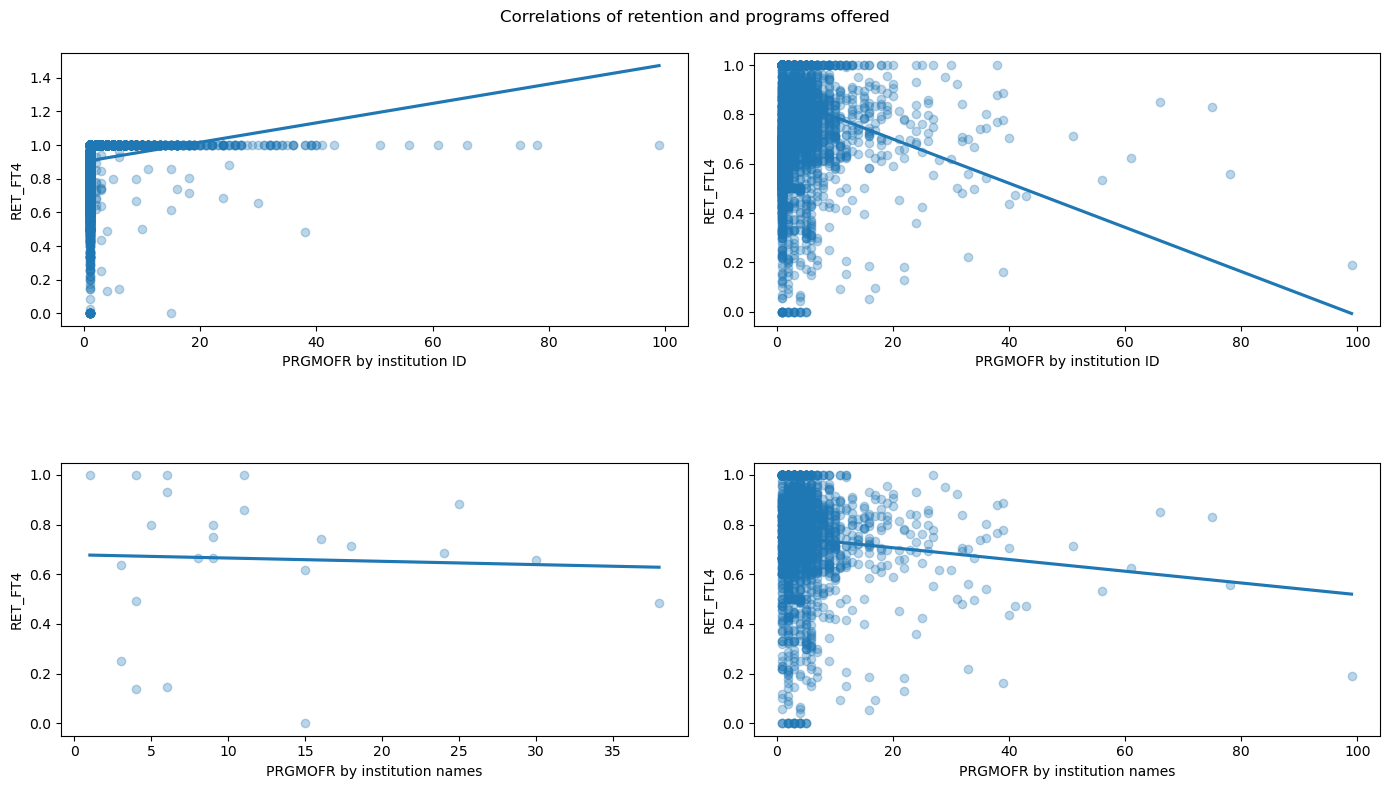

In [ ]:
fig, axs = plt.subplots(2, 2)
sns.regplot(x = "PRGMOFR", y = "RET_FT4", data = instid_per_instnm, scatter_kws={'alpha':0.3}, ci=False, ax=axs[0,0])
axs[0,0].set_xlabel("PRGMOFR by institution ID")
pos = axs[0,0].get_position()
pos.y0 += .4
axs[0,0].set_position(pos)
sns.regplot(x = "PRGMOFR", y = "RET_FTL4", data = instid_per_instnm, scatter_kws={'alpha':0.3}, ci=False, ax=axs[0,1])
axs[0,1].set_xlabel("PRGMOFR by institution ID")
pos = axs[0,1].get_position()
pos.y0 += .4
axs[0,1].set_position(pos)
sns.regplot(x = "PRGMOFR", y = "RET_FT4", data = data, scatter_kws={'alpha':0.3}, ci=False, ax=axs[1,0])
axs[1,0].set_xlabel("PRGMOFR by institution names")
sns.regplot(x = "PRGMOFR", y = "RET_FTL4", data = data, scatter_kws={'alpha':0.3}, ci=False, ax=axs[1,1])
axs[1,1].set_xlabel("PRGMOFR by institution names")
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.suptitle("Correlations of retention and programs offered");
plt.savefig('figures/institution_id_corr.png')

Reasons for further exploration:
- Note that student retention on the y axis is strictly boundeded within [0, 1], including retention by our hypothesized parent institutions (instition name). This suggests that instititution ID's with the same corresponding names are, in fact, parent institutions. 

In [ ]:
print("max retention of a parent institution: ", instid_per_instnm[["RET_FT4", "RET_FTL4"]].max().max())
print("min retention of a parent institution: ", instid_per_instnm[["RET_FT4", "RET_FTL4"]].min().min())

max retention of a parent institution:  1.0
min retention of a parent institution:  0.0


Reasons for skepticism:
- However, looking at the scatterplots, the relationships are not roughly linear and the correlations are weak so we will not pursue this variable further.

- It shuold be noted that some potential parent institutions could have more sub-institutions / ID's which aren't recorded. Similarly institutions could have the same name by conincedence and not be related. 

- Furthermore, a large proportion of ```PRGMOFR``` is null, meaning that our analysis on the non-nulls may not be representative of the sample and therefore of the population.

**Therefore, ```PRGMOFR``` cannot be proven to be significantly associated with student retention features ```RET_FT4``` and ```RET_FTL4```. If further information on parent-institutions becomes available, we can pursue this idea again.**

### SAT Scores vs. Retention Rate in four year institution

In [63]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'SAT_AVG']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'SAT_AVG']]

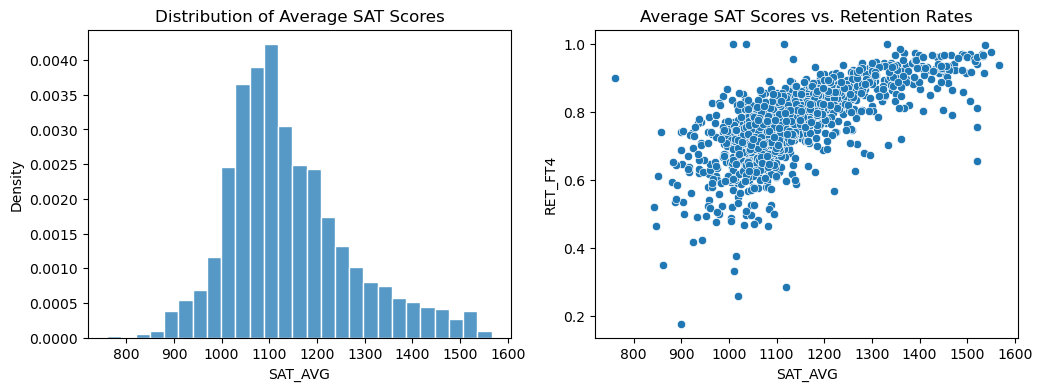

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=FT4_institutions, x='SAT_AVG', edgecolor='white', stat='density', ax=ax1)
ax1.set_title('Distribution of Average SAT Scores')
sns.scatterplot(data=FT4_institutions, x='SAT_AVG', y='RET_FT4', ax=ax2)
ax2.set_title('Average SAT Scores vs. Retention Rates')
plt.savefig('figures/SAT_AVG_VS_RET_FT4.png');

The average SAT score for four year institutions is around 1100. There is a positive relationship between average SAT score and retention rate. In other words, as the average SAT scores increase, the retention rate also increases.

### SAT Scores vs. Retention Rate in less than four year institution

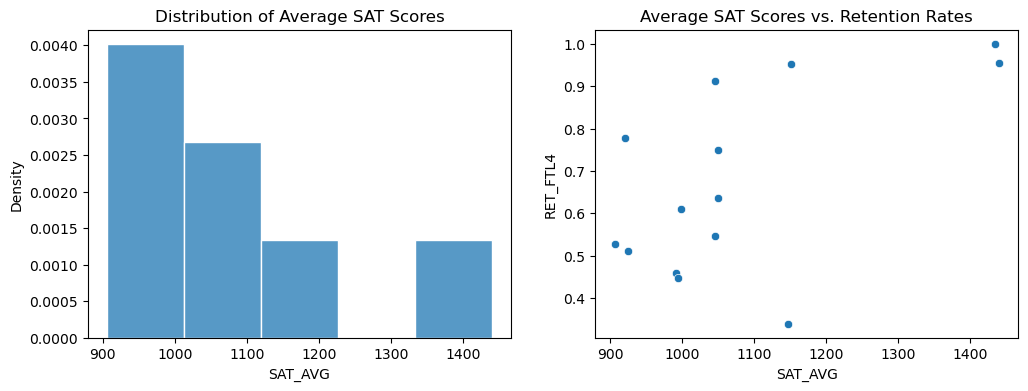

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=FTL4_institutions, x='SAT_AVG', edgecolor='white', stat='density', ax=ax1)
ax1.set_title('Distribution of Average SAT Scores')
sns.scatterplot(data=FTL4_institutions, x='SAT_AVG', y='RET_FTL4', ax=ax2)
ax2.set_title('Average SAT Scores vs. Retention Rates')
plt.savefig('figures/SAT_AVG_VS_RET_FTL4.png');

Less than four year institutions do not require the SAT score, therefore there is not too much SAT scores data collected. However, there appears to be a positive relationship between average SAT score and retention rate. As the average SAT scores increase, the retention rate also increases. 

## Linear Regression

In [ ]:
def filtered_df_two_columns(df, col1, col2):
    """
    Input: the dataframe and 2 variable column names
    Output: returns a new DataFrame that only contains values in both columns (no NA)
    """
    # Check that the input DataFrame contains both column names
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Input DataFrame does not contain both specified column names")

    # Select only the specified columns
    selected_cols = [col1, col2]
    new_df = df[selected_cols]

    # Use pandas' built-in methods to check which cells have numbers
    is_numeric = pd.to_numeric(new_df.iloc[:, 0], errors="coerce").notnull() & pd.to_numeric(new_df.iloc[:, 1], errors="coerce").notnull()

    # Filter the DataFrame to keep only the rows with numbers in both columns
    filtered_df = new_df.loc[is_numeric]

    return filtered_df

In [ ]:
# Pearson correlation coefficient 
def pearson_corr_coef(x, y):
    """
    Input: two lists of equal length
    Output: returns an array with the Pearson correlation coefficient
    """
    # Checking if the values in the list are the same
    if len(x) !=  len(y):
        raise ValueError("Input lists must have the same length")

    # Find Covariance
    covariance = np.cov(x, y)

    # Standard deviation of x and y
    stdx = np.std(x)
    stdy = np.std(y)

    # Returning Correlation coefficient
    return covariance / (stdx * stdy)

In [ ]:
def prediction_analysis(filtered_data):
    """
    Input: Filtered Dataframe that only has two columns
    Performs a simple linear regression analysis on the input data and generates 
    predictions based on the input variables.
    """
    # Check that the input DataFrame contains only two columns
    if len(filtered_data.columns) < 2:
        raise ValueError("Input DataFrame contains less than 2 columns (Must only include 2)")
    if len(filtered_data.columns) > 2:
        raise ValueError("Input DataFrame contains more than 2 columns (Must only include 2)")

    # Fit a simple linear regression model to the input data
    model = LinearRegression()
    X = filtered_data.iloc[:, 0].values.reshape(-1, 1)
    y = filtered_data.iloc[:, 1].values.reshape(-1, 1)
    model.fit(X, y)

    # Generate predictions for the output column based on the input variables
    pred_col = model.predict(X)

    return pred_col

In [ ]:
def regression_analysis_results(x_col, y_col, pred_col):
    """
    Input: Columns containing the x values, actual values, and predicted values
    Performs a regression analysis to determine how well the model predicts the actual values.
    Calculates and returns the R-squared value and generates a scatter plot of the predicted values 
    versus the actual values.
    """
    # Check that the input DataFrame contains both columns
    if len(y_col) != len(pred_col):
        raise ValueError("Input columns are not the same length")

    # Calculate the R-squared value
    r_squared = r2_score(y_col, pred_col)

    # Generate a scatter plot of the predicted values versus the actual values
    plt.scatter(y_col, pred_col)
    plt.plot(x_col, pred_col, color = 'red', linewidth = 2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Analysis Results')
    plt.show()

    return r_squared